In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, os.path
import pickle

1


<AxesSubplot:>

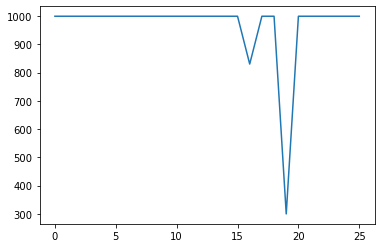

In [23]:
columns = [
    'AGENT_ID',
    'NTH_EPISODE',
    'STEPS_TAKEN',
    'TOTAL_REWARD',
    'MOVING_AVERAGE_REWARD',
    'SOLVED',
]

path, dirs, files = next(os.walk("./data"))
file_count = len(files)

print(file_count)
agent_dfs = []
for agent_id in range(file_count):
    agent_dfs.append(pd.read_pickle('./data/data_ddpg_agent{}.pk1'.format(agent_id)))

agent_dfs[0] = agent_dfs[0].reset_index(drop=True)
agent_dfs[0]['STEPS_TAKEN'].plot()